TradeID
TimeStamp
OrderType
Price
Quantity
BaseVolume
Total
Begin : 2022-08-02 22:26:03 
End : 2022-07-07 15:27:23


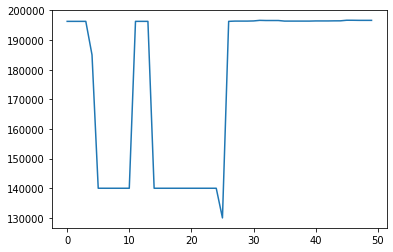

In [8]:
import numpy as np
import requests
market_history_url = "https://nova.bitcambio.com.br/api/v3/public/getmarkethistory"
markets_url = "https://nova.bitcambio.com.br/api/v3/public/getmarkets"
request = requests.get(markets_url)
for market in request.json()['result']:
    if market['MarketAsset'] == "BTC":
        market_name = market["MarketName"]
        break

number_of_exchanges = 50
request = requests.get(market_history_url,
                       params={
                           "market": market_name,
                           "count": str(number_of_exchanges)
                       })

results = request.json()['result']
print(*results[0], sep='\n')
result_len = len(results)
price_history = {
    "date": [],
    "price": []
}

for result in results:
    price_history["price"] += [int(result['Price'])]
    price_history["date"] += [result['TimeStamp']]

from matplotlib import pyplot as plt
ax = plt.subplot()
ax.plot(price_history['price'])
plt.show()
print("Begin :", results[0]['TimeStamp'], "\nEnd :", results[-1]["TimeStamp"])